In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import yaml

In [2]:
def read_csv(filepath, separator, column_names):
    features = pd.read_csv(filepath, sep=separator, names = column_names)
    return features



df = read_csv("../resources/ejemplo.csv", ",", ["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship",
                "race","sex","capital-gain","capital-loss", "hours-per-week", "native-country", "target"])

df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Clean up the data.

We see that there are several column with ? values, lets replace by nan and remove nan rows

In [3]:
#replace ? by null
import numpy as np
#replace ? by nan
df.replace(' ?', np.nan, inplace = True)

df.dropna(how ='any',inplace=True)


The data set contains Numerical and categorical data.
Lets transform the categorical data into labes and then use Random Forest

In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'sex', 'native-country', 'target'] 
labelEncoder = preprocessing.LabelEncoder()

emptyDf = pd.DataFrame()

emptyDF= df

for col in category_col:
    emptyDf[col+"original"] = df[col]
    df[col] = labelEncoder.fit_transform(df[col])
    

df_concat = pd.concat([emptyDf, df],sort=False)

df_concat.columns

df.head(30)
# making a copy of the data frame
#df_concat[["workclassoriginal","workclass"]].head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,2,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,4,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,2,159449,9,13,2,3,0,4,1,5178,0,40,38,1


**TODO:
  Show each value with its category

**Investigate random forest tunning

***Evaluate: Nstimators value

In [5]:
#NSTIMATORS
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df.values[:, 0:14]
Y = df.values[:,14]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)


n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results_roc = []
test_results_roc = []
accuracy_result = []
precission_result=[]

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, class_weight="balanced")
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results_roc.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results_roc.append(roc_auc)
   accuracy_result.append( accuracy_score(y_test,y_pred)*100)
   precission_result.append(metrics.classification_report(y_test,y_pred))


 

In [6]:
print( precission_result[0])

print("+++++++\n")

print( accuracy_result)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5671
           1       0.61      0.60      0.60      1870

   micro avg       0.80      0.80      0.80      7541
   macro avg       0.74      0.74      0.74      7541
weighted avg       0.80      0.80      0.80      7541

+++++++

[80.42699907174115, 81.92547407505636, 83.33112319321046, 84.20633868187242, 84.65720726694073, 85.30698846306855, 85.17438005569554, 85.4793793926535, 85.37329266675508]


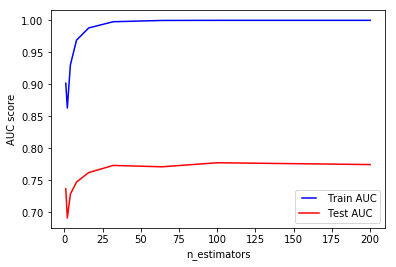

In [7]:
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results_roc, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results_roc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

Tendency from 64 stimators onwars the auc decrease. Best choice 64


**INvestigate max_depth



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

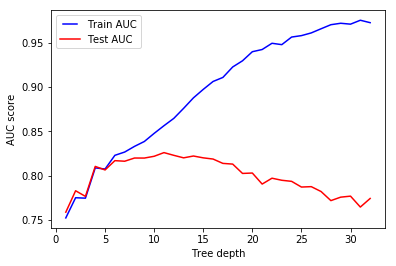

In [8]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, class_weight="balanced")
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

From max_depths 13 onwards the model underfit

# Investigate with the default Random forest valuesHHH

Lest investigate if our tune improves with our tune

In [9]:
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(x_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [10]:
y_pred= clf.predict(x_test)
print("Accuracy :", accuracy_score(y_test,y_pred)*100)
print("Precision:",classification_report(y_test,y_pred))

Accuracy : 84.35220792998275
Precision:               precision    recall  f1-score   support

           0       0.87      0.93      0.90      5671
           1       0.74      0.57      0.65      1870

   micro avg       0.84      0.84      0.84      7541
   macro avg       0.80      0.75      0.77      7541
weighted avg       0.84      0.84      0.84      7541



In [11]:
clf_adjusted = RandomForestClassifier(n_estimators=64,max_depth=13)
clf_adjusted.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
y_pred_adjusted= clf_adjusted.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)
print("Precision:",classification_report(y_test,y_pred))

Accuracy:  84.35220792998275
Precision:               precision    recall  f1-score   support

           0       0.87      0.93      0.90      5671
           1       0.74      0.57      0.65      1870

   micro avg       0.84      0.84      0.84      7541
   macro avg       0.80      0.75      0.77      7541
weighted avg       0.84      0.84      0.84      7541



**The Random Forest not improves with our tune 0.46 , lets use the default

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')   
    
scores

array([0.87994217, 0.87145886, 0.88752317, 0.88081795, 0.88769631])

The model is stable